In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

pd.set_option("display.max_columns",None)

df = pd.read_csv("D:\ITM\Data_Analysis\ZZ COGNIFYZ internship task\Clean Dataset\cleaned_dataset.csv")

df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,le petit souffle,162,makati city,"third floor, century city mall, kalayaan avenu...","century city mall, poblacion, makati city","century city mall, poblacion, makati city, mak...",121.027535,14.565443,"french, japanese, desserts",1100.0,botswana pula(p),yes,no,no,no,3,4.8,dark green,excellent,314
1,6304287,izakaya kikufuji,162,makati city,"little tokyo, 2277 chino roces avenue, legaspi...","little tokyo, legaspi village, makati city","little tokyo, legaspi village, makati city, ma...",121.014101,14.553708,japanese,1200.0,botswana pula(p),yes,no,no,no,3,4.5,dark green,excellent,591
2,6300002,heat - edsa shangri-la,162,mandaluyong city,"edsa shangri-la, 1 garden way, ortigas, mandal...","edsa shangri-la, ortigas, mandaluyong city","edsa shangri-la, ortigas, mandaluyong city, ma...",121.056831,14.581404,"seafood, asian, filipino, indian",400.0,botswana pula(p),yes,no,no,no,4,4.4,green,very good,270
3,6318506,ooma,162,mandaluyong city,"third floor, mega fashion hall, sm megamall, o...","sm megamall, ortigas, mandaluyong city","sm megamall, ortigas, mandaluyong city, mandal...",121.056475,14.585318,"japanese, sushi",400.0,botswana pula(p),no,no,no,no,4,4.9,dark green,excellent,365
4,6314302,sambo kojin,162,mandaluyong city,"third floor, mega atrium, sm megamall, ortigas...","sm megamall, ortigas, mandaluyong city","sm megamall, ortigas, mandaluyong city, mandal...",121.057508,14.584450,"japanese, korean",400.0,botswana pula(p),yes,no,no,no,4,4.8,dark green,excellent,229


# Level 2 :- Strategic Insights on Ratings, Cuisines, Geography, and Chains

-----------------------

#### Task 1 :- Restaurant Ratings
 
 
-> Analyze the distribution of aggregate ratings and determine the most common rating range.


In [2]:
rating_dist = df['Aggregate rating'].value_counts().sort_index()

rating_df = pd.DataFrame({
    'Aggregate Rating': rating_dist.index,
    'Restaurant Count': rating_dist.values
})

print(rating_df)

    Aggregate Rating  Restaurant Count
0                0.0              2148
1                1.8                 1
2                1.9                 2
3                2.0                 7
4                2.1                15
5                2.2                27
6                2.3                47
7                2.4                87
8                2.5               110
9                2.6               191
10               2.7               250
11               2.8               315
12               2.9               381
13               3.0               468
14               3.1               519
15               3.2               522
16               3.3               483
17               3.4               495
18               3.5               480
19               3.6               458
20               3.7               427
21               3.8               399
22               3.9               332
23               4.0               266
24               4.1     

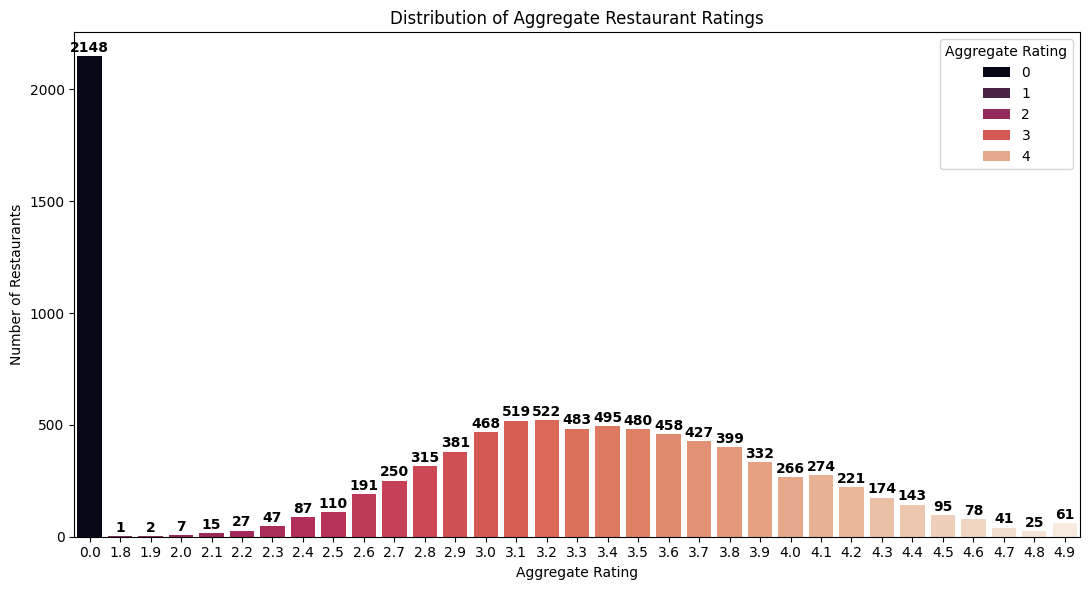

In [3]:
# Visualize the rating distribution on chart.

plt.figure(figsize=(11,6))
ax = sns.barplot(data=rating_df, x='Aggregate Rating', y='Restaurant Count', palette='rocket', hue='Aggregate Rating')

for i, v in enumerate(rating_df['Restaurant Count']):
    ax.text(i, v + 20, str(v), ha='center', fontweight='bold')

plt.title("Distribution of Aggregate Restaurant Ratings")
plt.xlabel("Aggregate Rating")
plt.ylabel("Number of Restaurants")
plt.tight_layout()
plt.show()

- Many (2,148) have a rating of **0.0**, which likely means they were **not rated at all**, not poorly rated.
- The most common actual rating among rated restaurants is **3.2**, followed closely by **3.1 and 3.3**.
- Ratings between **2.5 and 4.0** cover the most of the dataset — showing that most restaurants have moderate to good quality.

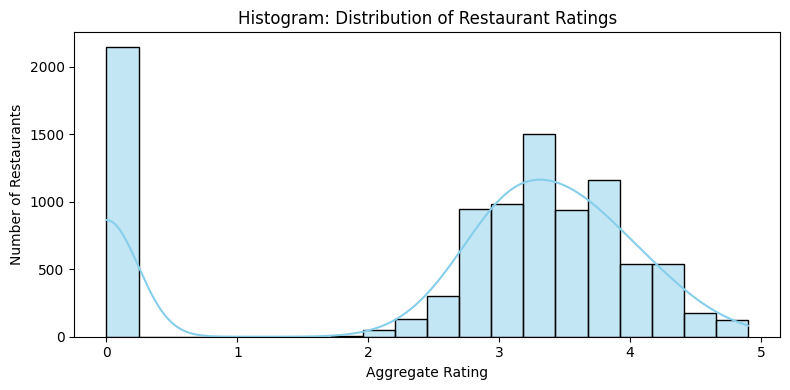

In [4]:
plt.figure(figsize=(8, 4))
ax = sns.histplot(df['Aggregate rating'], bins=20, kde=True, color='skyblue')

plt.title("Histogram: Distribution of Restaurant Ratings")
plt.xlabel("Aggregate Rating")
plt.ylabel("Number of Restaurants")
plt.tight_layout()
plt.show()


- There's a huge spike at **0.0** (not rated).
- Excluding 0.0, the data forms a **normal distribution** peaking around **3.0–3.5**, indicating that most customers give average to slightly above-average ratings.
- Very few restaurants achieve ratings above **4.5**, making high ratings rare and prestigious.

->  Calculate the average number of votes received by restaurants.


In [5]:
avg_votes_restaurant = df['Votes'].mean().round(2)

print(f"avg. votes of restaurant is around = {avg_votes_restaurant}")

avg. votes of restaurant is around = 156.77


- This shows that, on average, restaurants have a moderate level of customer interaction through voting.

- Some highly rated or popular restaurants may have thousands of votes, while many unrated or new listings may have zero.

--------------------

#### Task 2 :- Cuisine Combination

-> Identify the most common combinations of cuisines in the dataset. 

In [6]:
top_cuisines_combinaiton = df['Cuisines'].value_counts().head(10)

print(top_cuisines_combinaiton)

Cuisines
north indian                      936
north indian, chinese             511
chinese                           354
fast food                         354
north indian, mughlai             334
cafe                              299
bakery                            218
north indian, mughlai, chinese    197
bakery, desserts                  170
street food                       149
Name: count, dtype: int64


-> Determine if certain cuisine combinations tend to have higher ratings.

In [7]:
combo_rating = df.groupby("Cuisines")['Aggregate rating'].mean().round(2)

# Combine with frequency for top combos
combo_df = df['Cuisines'].value_counts().head(10).reset_index()
combo_df.columns = ['Cuisine Combination', 'Restaurant Count']
combo_df['Average Rating'] = combo_df['Cuisine Combination'].map(combo_rating)

# Sort by Average Rating to find the best cuisine combination
best_combo_df = combo_df.sort_values(by='Average Rating', ascending=False)

print(best_combo_df)

              Cuisine Combination  Restaurant Count  Average Rating
4           north indian, mughlai               334            2.89
5                            cafe               299            2.89
7  north indian, mughlai, chinese               197            2.57
1           north indian, chinese               511            2.42
8                bakery, desserts               170            2.32
9                     street food               149            2.16
3                       fast food               354            2.12
2                         chinese               354            2.04
6                          bakery               218            1.92
0                    north indian               936            1.67


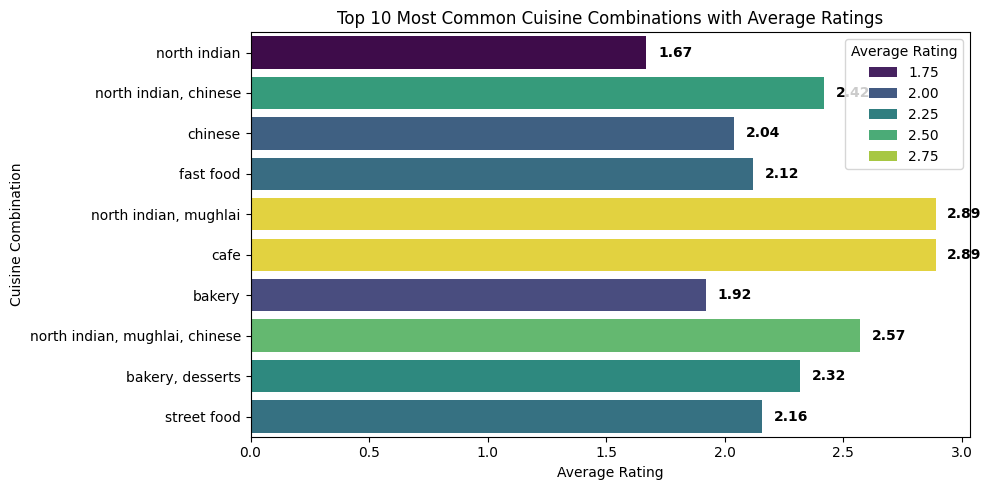

In [8]:
plt.figure(figsize=(10, 5))
sns.barplot(data=combo_df, y='Cuisine Combination', x='Average Rating', palette='viridis', hue = 'Average Rating')

# Add ratings on bars
for i, v in enumerate(combo_df['Average Rating']):
    plt.text(v + 0.05, i, str(v), color='black', fontweight='bold', va='center')

plt.title("Top 10 Most Common Cuisine Combinations with Average Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Cuisine Combination")
plt.tight_layout()
plt.show()


- The best cuisine combination based on customer ratings is **North Indian, Mughlai** and **Cafe**, both with an average rating of **2.89**. 

- This shows that customers prefer multi-cuisine combinations involving **Mughlai dishes** or cafe-style offerings.

-------------------

#### Task 3 :- Geographic Analysis

-> Plot the locations of restaurants on a map using longitude and latitude coordinates.
 
-> Identify any patterns or clusters of restaurants in specific areas.


In [13]:
# Force map to open in browser
pio.renderers.default = 'browser'

# Clean dataset
geo_df = df.dropna(subset=['Longitude', 'Latitude'])

# Create map
fig = px.scatter_map(
    geo_df,
    lat="Latitude",
    lon="Longitude",
    hover_name="Restaurant Name",
    hover_data=["City", "Aggregate rating", "Cuisines"],
    color_discrete_sequence=["fuchsia"],
    zoom=3,
    height=500
)

fig.update_layout(mapbox_style="carto-positron", title="Restaurant Locations Map")
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})

fig.write_html("Restaurant_Map.html")

#### Summary : -

- India has the highest restaurant concentration, particularly in metropolitan cities like New Delhi, Mumbai, Bengaluru, and Chennai.

- Significant clusters are also visible in:

- Australia (Sydney, Melbourne)

- United States (New York, Los Angeles, Texas region)

- Europe (London, some parts of Germany and France)

- Smaller restaurant clusters in Southeast Asia, Middle East, South Africa, and South America.

----------------------

#### Task 4 :- Restaurant Chains

-> Identify if there are any restaurant chains present in the dataset.

In [10]:
# Count number of branches per restaurant name
chain_counts = df['Restaurant Name'].value_counts()

# Filter chains (names with more than 1 branch)
restaurant_chains = chain_counts[chain_counts > 1]

print(restaurant_chains.head(10))  # Top 10 chains


Restaurant Name
cafe coffee day     83
domino's pizza      79
subway              63
green chick chop    51
mcdonald's          48
keventers           34
pizza hut           30
giani               29
baskin robbins      28
barbeque nation     26
Name: count, dtype: int64


-> Analyze the ratings and popularity of different restaurant chains.

In [ ]:
# Filter dataset to only chains
chains_df = df[df['Restaurant Name'].isin(restaurant_chains.index)]

# Group by Restaurant Name to get average rating and total votes
chain_analysis = chains_df.groupby('Restaurant Name').agg({
    'Aggregate rating': 'mean',
    'Votes': 'sum',
    'Restaurant ID': 'count'   # Total branches
}).reset_index()

chain_analysis.columns = ['Restaurant Name', 'Average Rating', 'Total Votes', 'Branch Count']
chain_analysis['Average Rating'] = chain_analysis['Average Rating'].round(2)

# Sort by popularity (votes)
chain_analysis = chain_analysis.sort_values(by='Total Votes', ascending=False)

print(chain_analysis.head(10)) 


               Restaurant Name  Average Rating  Total Votes  Branch Count
60             barbeque nation            4.35        28142            26
9    ab's - absolute barbecues            4.82        13400             4
78                   big chill            4.47        10853             4
241                 farzi cafe            4.37        10098             6
701                   truffles            3.95         9682             2
164                    chili's            4.58         8156             5
339               joey's pizza            4.25         7807             2
82             big yellow door            4.27         7511             3
572            saravana bhavan            4.13         7238             3
620                  starbucks            3.81         7139            18


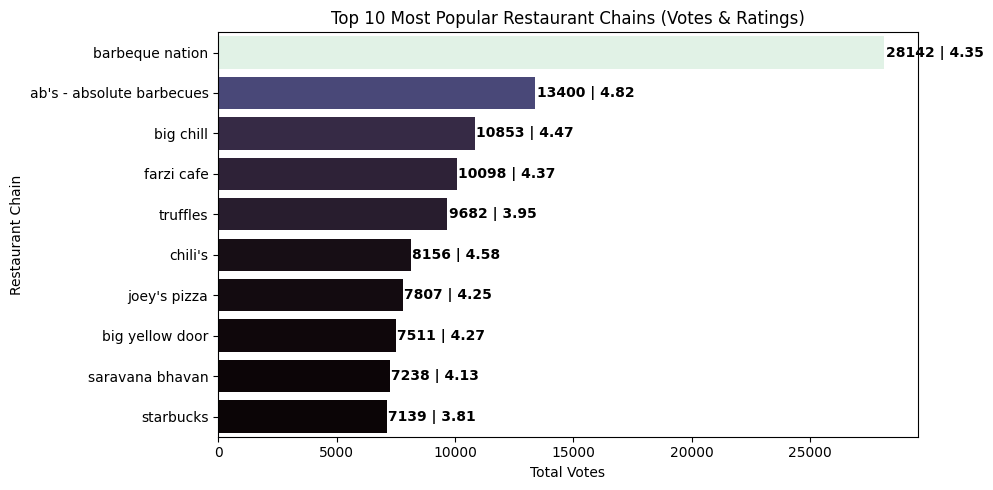

In [19]:
top_chains = chain_analysis.head(10)

plt.figure(figsize=(10, 5))
ax = sns.barplot(data=top_chains, x='Total Votes', y='Restaurant Name', palette='mako', hue='Total Votes', legend=False)

for i, (votes, rating) in enumerate(zip(top_chains['Total Votes'], top_chains['Average Rating'])):
    ax.text(
        votes + 50, i,
        f"{votes} | {rating:.2f}",
        color='black',
        va='center',
        fontweight='bold'
    )

# Set chart title and labels
plt.title("Top 10 Most Popular Restaurant Chains (Votes & Ratings)")
plt.xlabel("Total Votes")
plt.ylabel("Restaurant Chain")
plt.tight_layout()
plt.show()


- **Barbeque Nation** dominates the restaurant chains with a total of **28,142 votes**, making it the most popular chain by a large margin.

- **AB's - Absolute Barbecues** holds the second position with **13,400 votes**, showing strong competition in the premium dining segment.

- Casual dining chains like **Big Chill (10,853 votes)** and **Farzi Cafe (10,098 votes)** are also among the top 5, reflecting their customer loyalty and consistent service quality.

- Chains like **Truffles, Chili's, Joey's Pizza**, and **Starbucks** show substantial popularity with votes ranging between **7,000 to 9,000**, indicating steady customer engagement.

- Most of the top chains fall under categories like **barbecue, cafes, casual dining, and pizza chains**, reflecting popular dining preferences.
